# Airline passenger satisfaction
There are the following data about the airline passengers:
- ID,Unique passenger identifier
- Gender,Gender of the passenger (Female/Male)
- Age,Age of the passenger
- Customer Type,Type of airline customer (First-time/Returning)
- Type of Travel,Purpose of the flight (Business/Personal)
- Class,Travel class in the airplane for the passenger seat
- Flight Distance,Flight distance in miles
- Departure Delay,Flight departure delay in minutes
- Arrival Delay,Flight arrival delay in minutes
- Departure and Arrival Time Convenience,"Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""
- Satisfaction,Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)
- Other satisfaction columns with ratings [1-5]: Departure and Arrival Time Convenience ,Ease of Online Booking
 Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service, In-flight Entertainment, Baggage Handling



### Importing necessary packages:

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Initial data Exploration.

In [57]:
df=pd.read_csv('airline_passenger_satisfaction.csv')
df.drop('ID',axis=1,inplace=True)
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [58]:
df.shape

(129880, 23)

#### Data Validation and cleansing.
Check of duplicates in the dataframe.

In [59]:
df.duplicated().sum()

0

Checking data types and null values.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

Handling Missing data.

In [61]:
df.isna().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [62]:
df['Arrival Delay'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

Arrival Delay column distribution is left skewed, replacing null values with median is more reasonable.

In [63]:
df['Arrival Delay'].fillna(df['Arrival Delay'].median(),inplace=True)

In [64]:
assert df.isna().sum().sum()==0

Handling Outliers

In [65]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    first_quartile = df[col].quantile(0.25)
    second_quartile = df[col].quantile(0.75)
    IQR = second_quartile - first_quartile
    lower_bound = first_quartile - 1.5 * IQR
    upper_bound = second_quartile + 1.5 * IQR
    df.drop(df[~(df[col] >= lower_bound) & (df[col] <= upper_bound)].index, axis=0, inplace=True)

df.shape

(102171, 23)

### Recap:
- Airline passangers data shape=(~128000 rows, 23 column)
- Satisfaction columns is the target of our investigation.
- No duplicates in the data.
- We handled outliers and missing values.
- columns datatypes are of suitable types, so no type conversion was neeeded.

## EDA
- Exploring the relation between Satisfaction(target) and other causitive column.

Both genders seem to have satisfaction in equal rates.

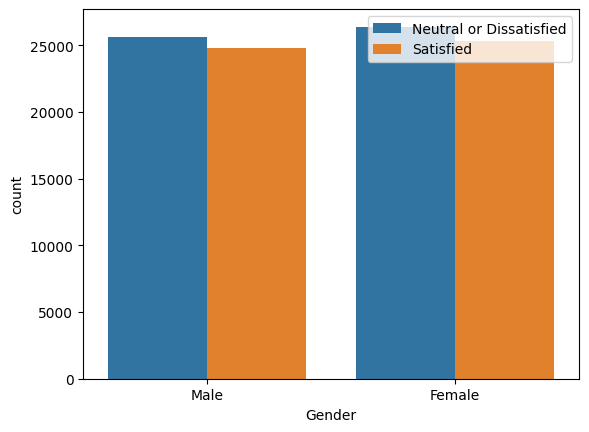

In [79]:
import seaborn as sns
sns.countplot(data=df,x='Gender',hue='Satisfaction')
plt.legend()
plt.show()

Older people seem to be satisfied than others.

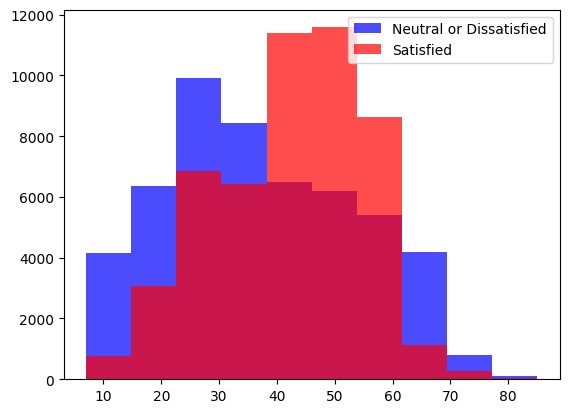

In [88]:
plt.hist(x=df[df['Satisfaction']=='Neutral or Dissatisfied']['Age'],color='b',alpha=0.7,label='Neutral or Dissatisfied')
plt.hist(x=df[df['Satisfaction']=='Satisfied']['Age'],color='r',alpha=0.7,label='Satisfied')
plt.legend()
plt.show()

From the following plot we can find that:
- Customers of type First-time are less satisfied than Returning.
- People who are travelling for Business purposes are more satisfied.
- People who traveled in business class have slightly more satisfaction that other types.

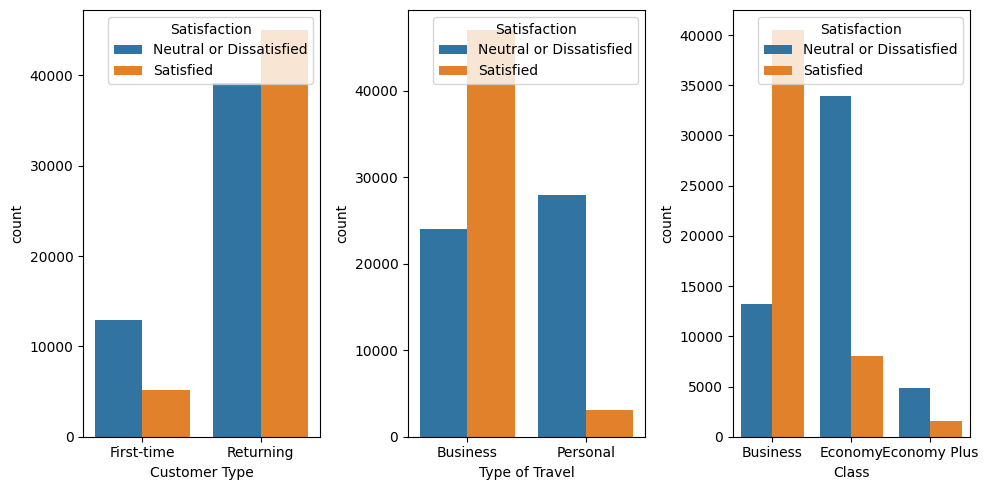

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,5))
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]
sns.countplot(data=df, x='Customer Type', ax=axes[0],hue='Satisfaction')
sns.countplot(data=df, x='Type of Travel', ax=axes[1],hue='Satisfaction')
sns.countplot(data=df, x='Class', ax=axes[2],hue='Satisfaction')
plt.tight_layout()
plt.show()


<BarContainer object of 2 artists>

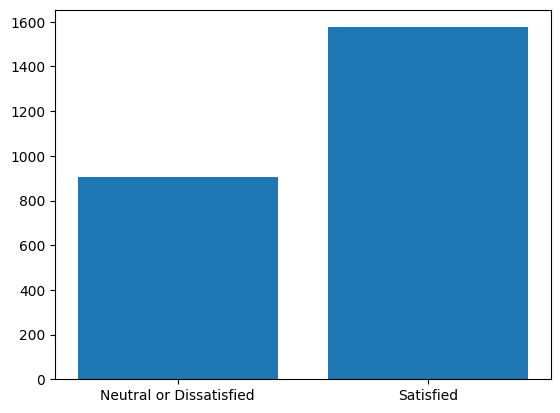

In [101]:
fig,ax=plt.subplots()
ax.bar(df.Satisfaction.unique(),df.groupby('Satisfaction')['Flight Distance'].mean())

People with less departure and arrival delay are more satisfied.

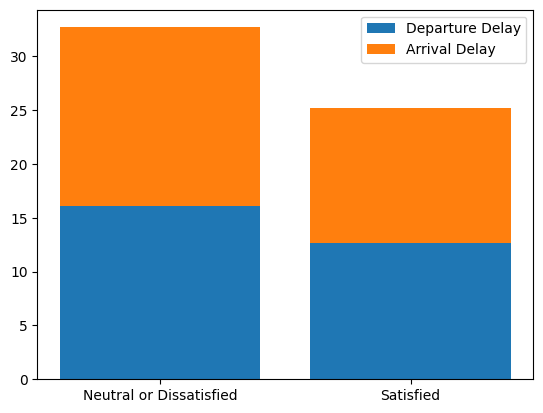

In [107]:
fig,ax=plt.subplots()
ax.bar(df.Satisfaction.unique(),df.groupby('Satisfaction')['Departure Delay'].mean(),label='Departure Delay')
ax.bar(df.Satisfaction.unique(),df.groupby('Satisfaction')['Arrival Delay'].mean(),bottom=df.groupby('Satisfaction')['Departure Delay'].mean(),label='Arrival Delay')
plt.legend()
plt.show()